In [76]:
import numpy
import matplotlib.pyplot as plt


In [77]:
nx=20
ny=20
nt=100
dy=1/(ny-1)
dx=2/(nx-1)
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,1,ny)

p=numpy.zeros((ny,nx))

p[:,0]=0
p[:,-1]=y
p[0,:]=p[1,:]
p[-1,:]=p[-2,:]


In [78]:
def plot_2d(x,y,p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = plt.axes(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=plt.cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')


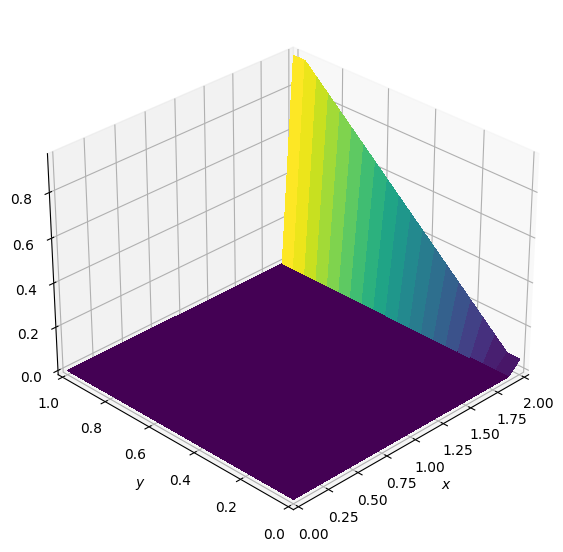

In [79]:
plot_2d(x,y,p)



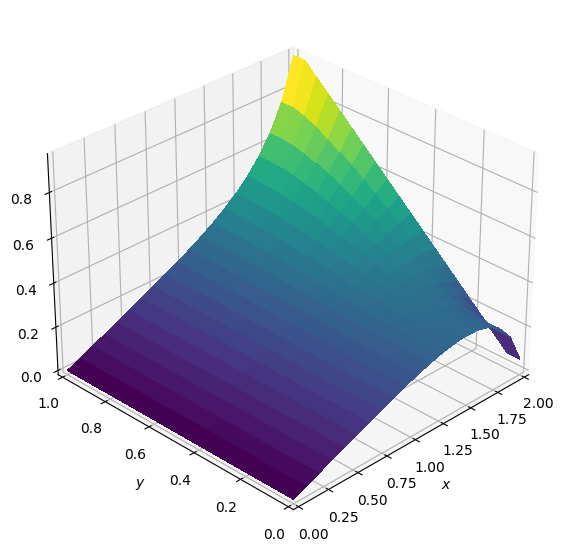

In [80]:
def laplace(p,dy,dx,target_error):
    error=1
    while error>target_error :
        pn=p.copy()
        
        p[1:-1,1:-1]=((dy**2 *(pn[1:-1,2:]+p[1:-1,0:-2])+
                        dx**2*(pn[2:,1:-1]+pn[0:-2,1:-1]))/
                        (2*(dx**2+dy**2)))
        
        p[:,0]=0
        p[:,-1]=y
        p[0,:]=p[1,:]
        p[-1,:]=p[-2,:]
        
        error=(numpy.sum(numpy.abs(p[:])-numpy.abs(pn[:]))/numpy.sum(numpy.abs(pn[:])))

    return p  

p=laplace(p,dy,dx,.000000000001)
plot_2d(x,y,p)